<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [3]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [4]:
#Consulter le nombre de colonnes
print(len(population.columns))
#La nature des données dans chacune des colonnes
print(population.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
population.count()

3
Zone       object
Année       int64
Valeur    float64
dtype: object


Zone      1416
Année     1416
Valeur    1416
dtype: int64

In [5]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] = population['Valeur']*1000
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [7]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [8]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [10]:
#Consulter le nombre de colonnes
print(len(dispo_alimentaire.columns))

18


In [12]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [11]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [13]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire['Production'] = dispo_alimentaire['Production']*1000000
dispo_alimentaire['Importations - Quantité'] = dispo_alimentaire['Importations - Quantité']*1000000
dispo_alimentaire['Exportations - Quantité'] = dispo_alimentaire['Exportations - Quantité']*1000000
dispo_alimentaire['Variation de stock'] = dispo_alimentaire['Variation de stock']*1000000
dispo_alimentaire['Semences'] = dispo_alimentaire['Semences']*1000000
dispo_alimentaire['Pertes'] = dispo_alimentaire['Pertes']*1000000
dispo_alimentaire['Aliments pour animaux'] = dispo_alimentaire['Aliments pour animaux']*1000000
dispo_alimentaire['Nourriture'] = dispo_alimentaire['Nourriture']*1000000
dispo_alimentaire['Autres Utilisations'] = dispo_alimentaire['Autres Utilisations']*1000000
dispo_alimentaire['Traitement'] = dispo_alimentaire['Traitement']*1000000



In [14]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [15]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [16]:
#Consulter le nombre de colonnes
print(len(aide_alimentaire.columns))

4


In [17]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [18]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire' : 'Zone'})

In [19]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000

In [20]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [21]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [22]:
#Consulter le nombre de colonnes
print(len(sous_nutrition.columns))

3


In [23]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [26]:
#Conversion de la colonne sous nutrition en numérique
conversion_numerique = sous_nutrition['Valeur'].astype(float)

In [25]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition = sous_nutrition.fillna(0)

In [27]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns= {'Valeur' : 'Sous nutrition'})

In [28]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous nutrition'] = sous_nutrition['Sous nutrition']*1000000

In [29]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Sous nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [30]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
nutrition = pd.merge(population[population['Année']==2017], sous_nutrition[sous_nutrition['Année']=='2016-2018'], on='Zone', how='inner')


In [31]:
#Affichage du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(nutrition.shape[1]))


Le tableau comporte 203 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


In [32]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
total_personne_sous_nutrition = round(nutrition['Sous nutrition'].sum())
print('Population en sous nutrition est de', total_personne_sous_nutrition ,' de personnes')

pourcentage_population_sous_nutrition = round((total_personne_sous_nutrition/round(nutrition['Population'].sum()))*100)
print('Le pourcentage de personne en état de sous nutrition est de', pourcentage_population_sous_nutrition,'% ' 'en 2017')

Population en sous nutrition est de 535700000  de personnes
Le pourcentage de personne en état de sous nutrition est de 7 % en 2017


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [33]:
#Combien mange en moyenne un être humain ? Source => Santé Magazine
2500 kcal

SyntaxError: invalid syntax (1037779014.py, line 2)

In [34]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
disponibilite = pd.merge(population[population['Année']==2017], dispo_alimentaire, on='Zone', how='inner')

In [35]:
#Affichage du nouveau dataframe
disponibilite.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
disponibilite['dispo_kcal'] = round(disponibilite['Disponibilité alimentaire (Kcal/personne/jour)']*365*disponibilite['Population'])
disponibilite.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
0,Afghanistan,2017,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,...,53.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,6.624041e+10
1,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,5.299232e+10


In [38]:
#Calcul du nombre d'humains pouvant être nourris
population_nourrissable = round((disponibilite['dispo_kcal'].sum())/(2500*365))

print('La population nourrissable en 2017 est de', population_nourrissable, 'de personnes')
print(round(disponibilite['dispo_kcal'].sum()))


La population nourrissable en 2017 est de 8367593851 de personnes
7635429388975815


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [39]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_vegetaux = pd.merge(population[population['Année']==2017], dispo_alimentaire[dispo_alimentaire['Origine'] =='vegetale'], on='Zone', how='inner')
dispo_alimentaire_vegetaux.head()

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
1,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_alimentaire_vegetaux['dispo_kcal_vegetal'] = round(dispo_alimentaire_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']*365*dispo_alimentaire_vegetaux['Population'])

dispo_alimentaire_vegetaux.head(10)


,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal_vegetal
0,Afghanistan,2017,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,...,41.0,2000000.0,4.000000e+07,3.900000e+07,2000000.0,3.000000e+06,0.0,0.0,0.0,1.324808e+10
1,Afghanistan,2017,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,...,2.0,0.0,2.000000e+06,2.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,2017,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
3,Afghanistan,2017,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,...,82.0,0.0,8.200000e+07,8.200000e+07,0.0,0.000000e+00,0.0,0.0,0.0,5.299232e+10
4,Afghanistan,2017,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,...,3.0,0.0,3.000000e+06,3.000000e+06,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
5,Afghanistan,2017,36296113.0,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,...,5992.0,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,1.813662e+13
6,Afghanistan,2017,36296113.0,Boissons Alcooliques,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
7,Afghanistan,2017,36296113.0,Café,vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
8,Afghanistan,2017,36296113.0,Coco (Incl Coprah),vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
9,Afghanistan,2017,36296113.0,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [41]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

kcal_vegetal_dispo = round((dispo_alimentaire_vegetaux['dispo_kcal_vegetal'].sum())/(2500*365))

print('Le nombre de personne nourrissable avec les végétaux est de',kcal_vegetal_dispo,'en 2017')
print(round(dispo_alimentaire_vegetaux['dispo_kcal_vegetal'].sum()))

Le nombre de personne nourrissable avec les végétaux est de 6904305685 en 2017
6300178937197865


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [42]:
#Calcul de la disponibilité totale
round(dispo_alimentaire['Disponibilité intérieure'].sum())

9848994

Text(0.5, 1.0, 'Répartition de la disponibilité intérieur')

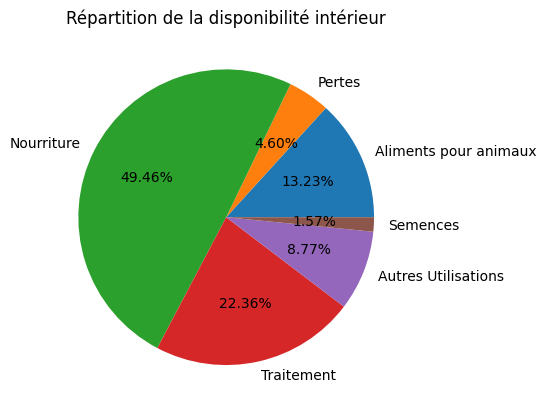

In [43]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
categories = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Traitement','Autres Utilisations', 'Semences']

valeur  = [i.sum() for i in [dispo_alimentaire[cat] for cat in categories]]
total   = dispo_alimentaire['Disponibilité intérieure'].sum()
pourcentage = [round(value/total*100) for value in valeur]

plt.pie(x=pourcentage, labels=categories, autopct='%.2f%%')
plt.title('Répartition de la disponibilité intérieur')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [44]:
#Création d'une liste avec toutes les variables
cereales = ['Blé', 'Orge', 'Maïs', 'Seigle','Avoine', 'Millet', 'Sorgho', 'Céréales', 'Autres']

In [45]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_alimentaire_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(cereales)]

dispo_alimentaire_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992.0,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,313.0,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13.0,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,524.0,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
67,Afrique du Sud,Avoine,vegetale,8000000.0,0.0,5.0,0.75,0.09,0.16,49.0,4000000.0,2.500000e+07,4.000000e+07,1000000.0,2.800000e+07,1000000.0,0.0,0.0


Text(0.5, 1.0, 'Répartition alimentation humaine')

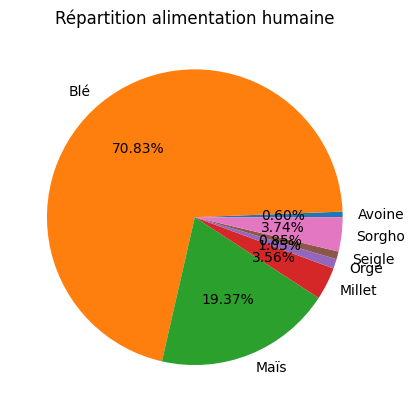

In [46]:
#Affichage de la proportion d'alimentation animale
alimentation_humaine_cereales = dispo_alimentaire_cereales.groupby(['Produit'])['Nourriture'].sum()
plt.pie(x=alimentation_humaine_cereales, labels=alimentation_humaine_cereales.index, autopct='%.2f%%')
plt.title('Répartition alimentation humaine')

Text(0.5, 1.0, 'Répartition alimentation animale')

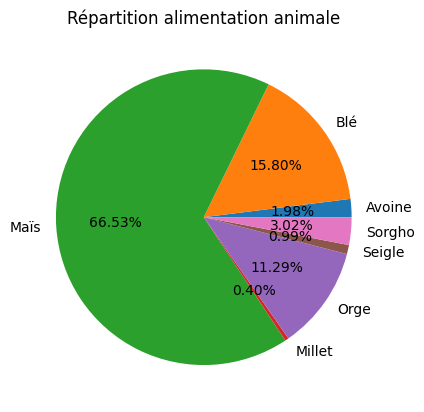

In [47]:
#Affichage de la proportion d'alimentation animale
alimentation_animal_cereales = dispo_alimentaire_cereales.groupby(['Produit'])['Aliments pour animaux'].sum()
plt.pie(x=alimentation_animal_cereales, labels=alimentation_animal_cereales.index, autopct='%.2f%%')
plt.title('Répartition alimentation animale')


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [48]:
#Création de la colonne proportion par pays
sous_nutrition_popultation = pd.merge(population[population['Année']==2017], sous_nutrition[sous_nutrition['Année']== '2016-2018'], on='Zone', how='inner')
sous_nutrition_popultation['Proportion par pays']= pop_sous_nutrition = round((sous_nutrition_popultation['Sous nutrition']/sous_nutrition_popultation['Population'])*100, 2)

sous_nutrition_popultation.head()




,Zone,Année_x,Population,Année_y,Sous nutrition,Proportion par pays
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,5.44
2,Albanie,2017,2884169.0,2016-2018,100000.0,3.47
3,Algérie,2017,41389189.0,2016-2018,1300000.0,3.14
4,Allemagne,2017,82658409.0,2016-2018,0.0,0.00


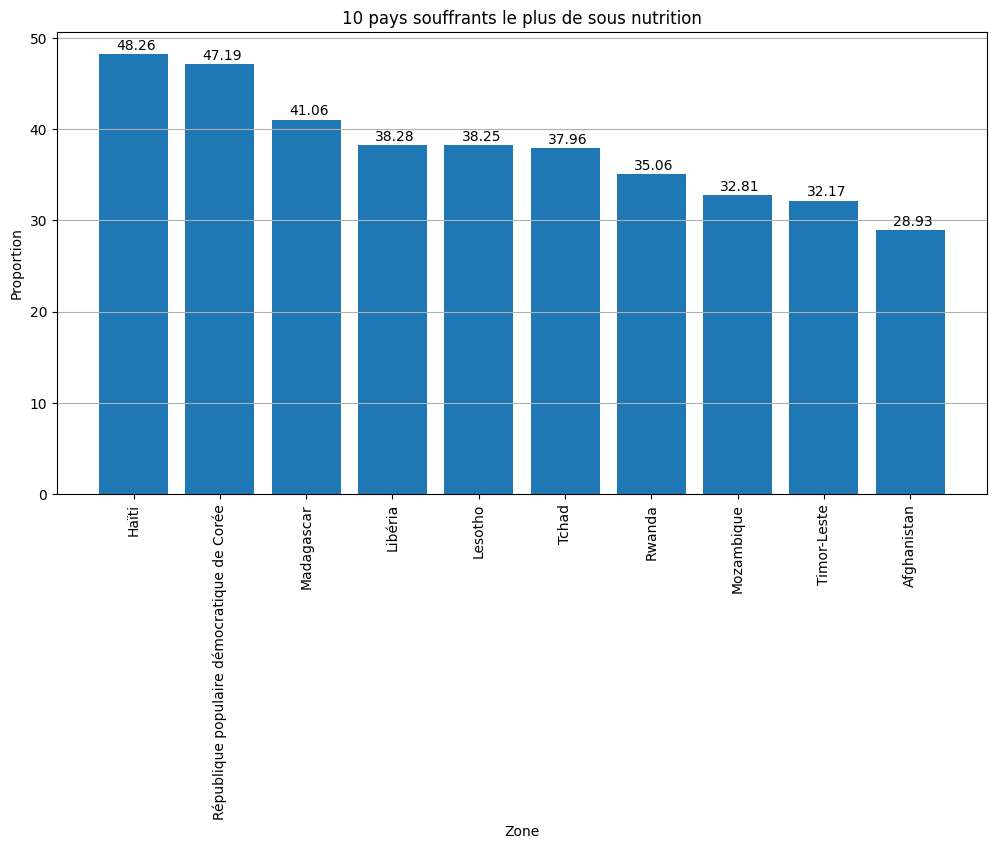

In [49]:
#affichage après trie des 10 pires pays
dix_pires_pays = sous_nutrition_popultation.sort_values(by=['Proportion par pays'], ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.title('10 pays souffrants le plus de sous nutrition')
plt.xticks(rotation = 'vertical')
plt.grid(axis='y')
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.bar(height=dix_pires_pays['Proportion par pays'], x=dix_pires_pays['Zone'])

valeur_dix_pire_pays = dix_pires_pays['Proportion par pays'].tolist()
for i in range(10):
    plt.text(i-0.2, valeur_dix_pire_pays[i]+0.5, valeur_dix_pire_pays[i])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [50]:
#calcul du total de l'aide alimentaire par pays
total_aide_alimentaire_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

total_aide_alimentaire_par_pays.head()

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000


In [51]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
pays_plus_aide_2013 = total_aide_alimentaire_par_pays.sort_values(by=['Valeur'], ascending=False)
pays_plus_aide_2013.head(10)

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [52]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
evolution_aide_alimentaire = aide_alimentaire.drop('Produit', axis=1)
evolution_aide_alimentaire = aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

evolution_aide_alimentaire.head()

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [53]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
cinq_pays_plus_aide_alimentaire = evolution_aide_alimentaire.sort_values(by=['Valeur'], ascending=False)
print(cinq_pays_plus_aide_alimentaire[:10])

list_cinq_pays_plus_aide_alimentaire = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

                          Zone  Année     Valeur
158  République arabe syrienne   2014  651870000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
157  République arabe syrienne   2013  563566000
159  République arabe syrienne   2015  524949000
217                      Yémen   2016  465574000
193              Soudan du Sud   2014  450610000
216                      Yémen   2015  372306000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000


In [54]:
#On filtre sur le dataframe avec notre liste
filtre_pays_plus_aide_alimentaire = cinq_pays_plus_aide_alimentaire[cinq_pays_plus_aide_alimentaire['Zone'].isin(list_cinq_pays_plus_aide_alimentaire)]
filtre_pays_plus_aide_alimentaire.head(10)



,Zone,Année,Valeur
158,République arabe syrienne,2014,651870000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000
157,République arabe syrienne,2013,563566000
159,République arabe syrienne,2015,524949000
217,Yémen,2016,465574000
193,Soudan du Sud,2014,450610000
216,Yémen,2015,372306000
189,Soudan,2013,330230000
190,Soudan,2014,321904000


<Axes: title={'center': "Evolution de l'aide entre 2013 et 2016"}, xlabel='Année', ylabel='Valeur'>

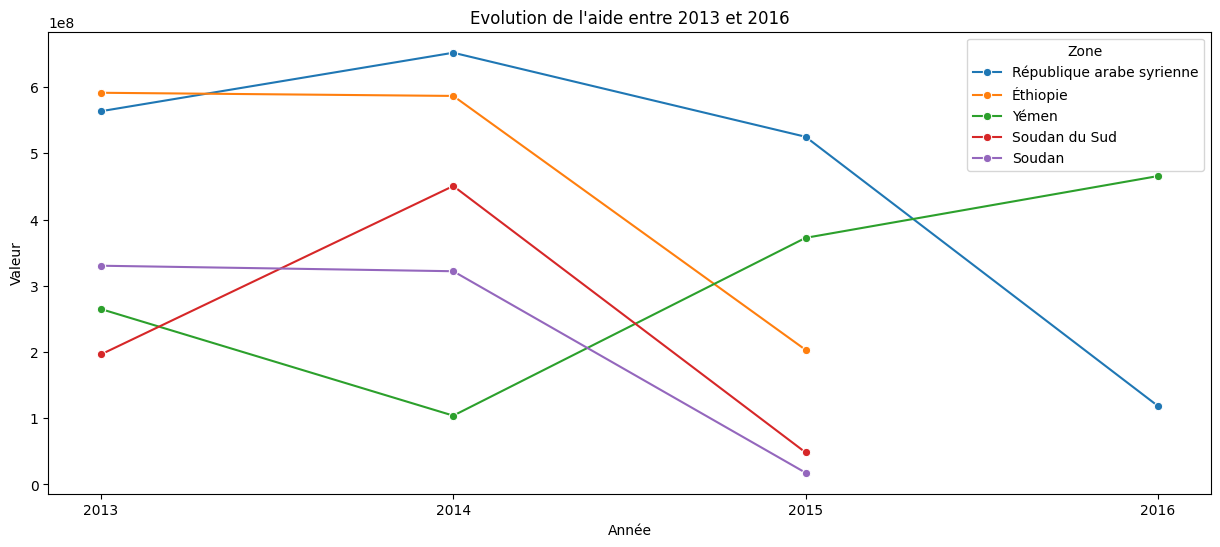

In [55]:
# Affichage des pays avec l'aide alimentaire par année

plt.figure(figsize=(15,6))
plt.title("Evolution de l'aide entre 2013 et 2016")
plt.xticks([0, 2013, 2014, 2015, 2016])
sns.lineplot(data=filtre_pays_plus_aide_alimentaire, x='Année', y='Valeur', hue='Zone', marker='o')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [56]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal_par_pays= dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

dispo_kcal_par_pays.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


<BarContainer object of 10 artists>

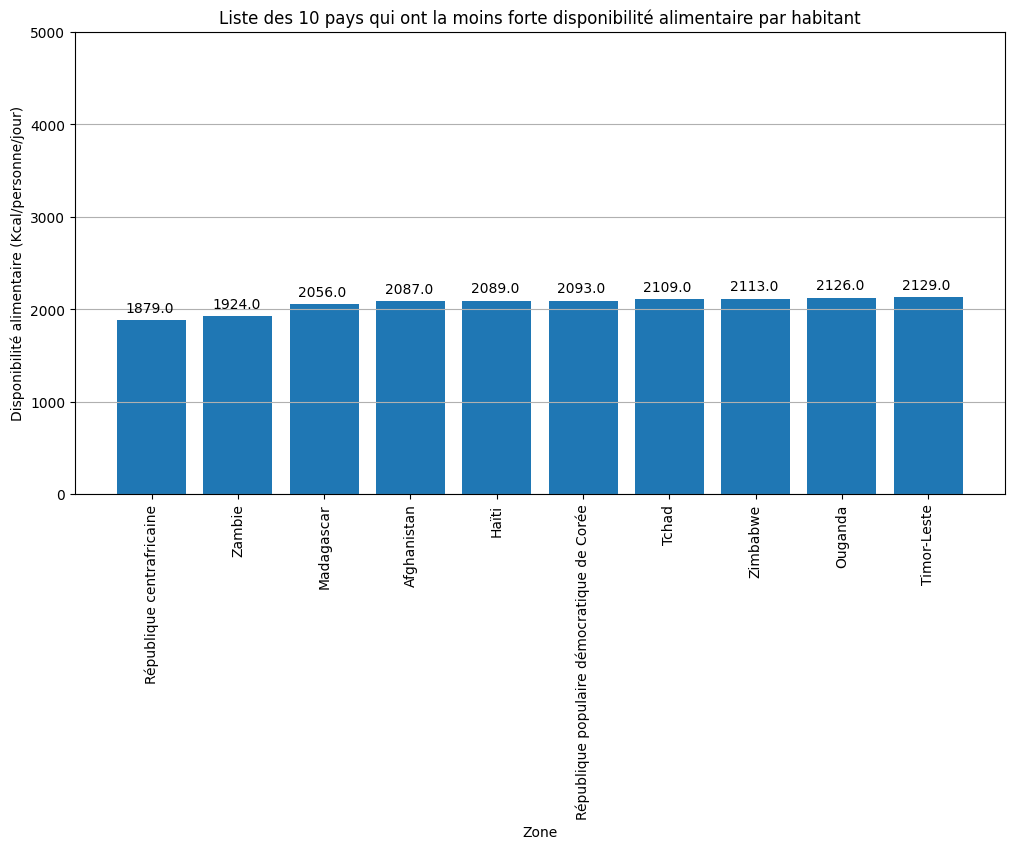

In [57]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
dix_pays_moins_dispo_alimentaire = dispo_kcal_par_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=True).head(10).reset_index()
dix_pays_moins_dispo_alimentaire.head(10)

plt.figure(figsize=(12,6))
plt.xticks(rotation = 'vertical')
plt.title('Liste des 10 pays qui ont la moins forte disponibilité alimentaire par habitant')
plt.grid(axis='y')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylim([0, 5000])
plt.yticks([0, 1000, 2000, 3000, 4000, 5000])
valeur_dispo_alimentaire = dix_pays_moins_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.3, valeur_dispo_alimentaire[i]+90,valeur_dispo_alimentaire[i])
plt.bar(height=dix_pays_moins_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'], x=dix_pays_moins_dispo_alimentaire['Zone'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

<BarContainer object of 10 artists>

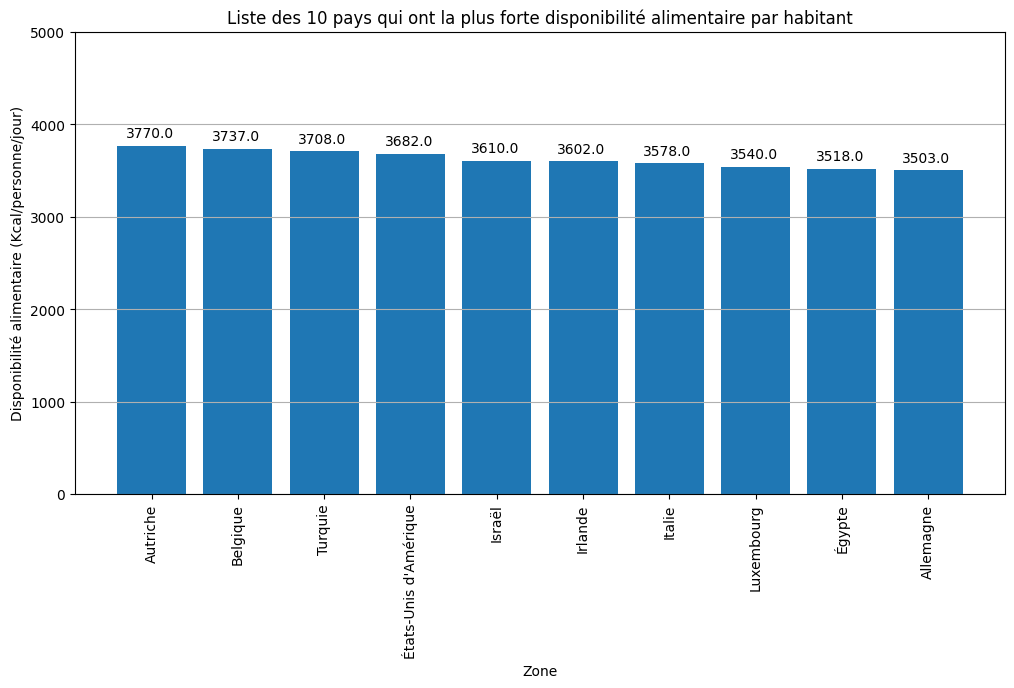

In [58]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dix_pays_forte_dispo_alimentaire = dispo_kcal_par_pays.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
plt.xticks(rotation = 'vertical')
plt.title('Liste des 10 pays qui ont la plus forte disponibilité alimentaire par habitant')
plt.grid(axis='y')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.ylim([0, 5000])
plt.yticks([0, 1000, 2000, 3000, 4000, 5000])
valeur_dix_plus_dispo_alimentaire = dix_pays_forte_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()
for i in range(10):
    plt.text(i-0.3, valeur_dix_plus_dispo_alimentaire[i]+90,valeur_dix_plus_dispo_alimentaire[i])
plt.bar(height=dix_pays_forte_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'], x=dix_pays_forte_dispo_alimentaire['Zone'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [59]:
#création d'un dataframe avec uniquement la Thaïlande 
thailande = pd.merge(population[population['Zone']=='Thaïlande'], sous_nutrition, on='Zone', how= 'inner')


In [60]:
#Calcul de la sous nutrition en Thaïlande
pop_thailande_sous_nutrition = round(thailande['Sous nutrition'].sum())
print('Le pourcentage de la population en sous nutrition en Thaïlande est de', pop_thailande_sous_nutrition)

Le pourcentage de la population en sous nutrition en Thaïlande est de 220800000


In [61]:
# On calcule la proportion exportée en fonction de la proportion
variable = dispo_alimentaire[(dispo_alimentaire['Produit']=='Manioc') & (dispo_alimentaire['Zone']=='Thaïlande')]
production = round((variable['Exportations - Quantité'].sum()/variable['Production'].sum())*100)
print('La Thaïlande exporte', production,'%' 'de sa production de manioc')

La Thaïlande exporte 83 %de sa production de manioc


In [62]:
#Donner la part de personnes en état de sous- nutrition pour ce pays

part_pop_sous_nutrition = round((thailande['Sous nutrition'].sum()/thailande['Population'].sum())*100)

print('Le pourcentage de la population en sous nutrition en Thaïlande est de', part_pop_sous_nutrition, '%')


Le pourcentage de la population en sous nutrition en Thaïlande est de 9 %


In [63]:
#Quelle est la disponibilité par habitant pour la Thaïlande ? 
thailande_pays = dispo_alimentaire[dispo_alimentaire['Zone']=='Thaïlande']
dispo_alimentaire_thailande = round(thailande_pays['Disponibilité alimentaire (Kcal/personne/jour)'].sum()*365)
print('La disponibilité alimentaire en Thaïlande est de', dispo_alimentaire_thailande,'par personne par an')

La disponibilité alimentaire en Thaïlande est de 1016525 par personne par an


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyses complémentaires</h2>
</div>

In [64]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les paysui semblent être 
#le plus en difficulté au niveau alimentaire"

annee = [2013, 2014, 2015, 2016]
list_cinq_pays_plus_aide_alimentaire = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

pays_aide_alimentaire = pd.merge(population[population['Année'].isin(annee)], dispo_alimentaire[dispo_alimentaire['Zone'].isin(list_cinq_pays_plus_aide_alimentaire)], on='Zone', how='inner')
pays_aide_alimentaire['dispo_kcal'] = pays_aide_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']*365*pays_aide_alimentaire['Population']
pop_nourrissable = pays_aide_alimentaire.groupby('Zone')['dispo_kcal'].sum()/(2500*1460)
data_filtre_pays_annee= population[(population['Année'].isin(annee)) & (population['Zone'].isin(list_cinq_pays_plus_aide_alimentaire))]
total_pop_par_annee=data_filtre_pays_annee.groupby(['Zone', 'Année'])['Population'].sum()
poucentage_pop_pouvant_etre_nourri= round((pop_nourrissable/total_pop_par_annee)*100,2)
poucentage_pop_pouvant_etre_nourri.head(20)



Zone                       Année
République arabe syrienne  2013       NaN
                           2014       NaN
                           2015       NaN
                           2016       NaN
Soudan                     2013     96.87
                           2014     94.56
                           2015     92.31
                           2016     90.12
Soudan du Sud              2013       NaN
                           2014       NaN
                           2015       NaN
                           2016       NaN
Yémen                      2013     92.25
                           2014     89.83
                           2015     87.55
                           2016     85.39
Éthiopie                   2013     88.82
                           2014     86.36
                           2015     84.02
                           2016     81.77
dtype: float64

In [65]:
pop_en_sous_nutrition= sous_nutrition.groupby(['Zone', 'Année'])['Sous nutrition'].sum().reset_index()
pays_moins_nourri= pop_en_sous_nutrition.sort_values(by=['Sous nutrition'], ascending=False)
pays_moins_nourri.head(10)

,Zone,Année,Sous nutrition
450,Inde,2012-2014,203800000.0
451,Inde,2013-2015,198300000.0
452,Inde,2014-2016,193100000.0
453,Inde,2015-2017,190900000.0
454,Inde,2016-2018,190100000.0
455,Inde,2017-2019,189200000.0
762,Pakistan,2012-2014,31100000.0
763,Pakistan,2013-2015,28500000.0
1194,Éthiopie,2012-2014,26200000.0
767,Pakistan,2017-2019,26100000.0
